In [3]:
import numpy as np
import mujoco
import mujoco.viewer as viewer
import mediapy as media

In [4]:
xml = './low_cost_robot/scene.xml'
model = mujoco.MjModel.from_xml_path(xml)
data = mujoco.MjData(model)

model.vis.global_.offheight = 480
model.vis.global_.offwidth = 640

jname = 'joint6'

renderer = mujoco.Renderer(model, height=480, width=640)

In [5]:
camera = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, camera)
camera.distance = 0.5

In [6]:
qinit = data.qpos.copy()
data.qpos[0] = -np.pi/3
data.qpos[1] = np.pi/3
data.qpos[3] = np.pi/2
qpos0 = data.qpos.copy()

In [7]:
mujoco.mj_resetDataKeyframe(model, data, 1)
mujoco.mj_forward(model, data)
init_point = data.body(jname).xpos.copy()
renderer.update_scene(data, camera)
init_plot = renderer.render()
print(init_point)

[0.     0.2145 0.1665]


In [8]:
data.qpos = qpos0
mujoco.mj_forward(model, data)
target_point = data.body(jname).xpos.copy()
target_rot = data.body(jname).xmat.copy()
renderer.update_scene(data, camera)
target_plot = renderer.render()
print()

[0.     0.2145 0.1665] [-0.06837517  0.03052358  0.22124965]


Initial position,Desire end effector position

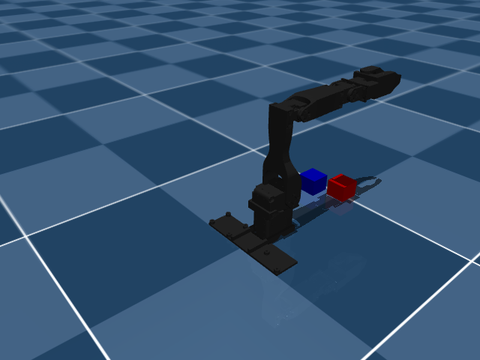
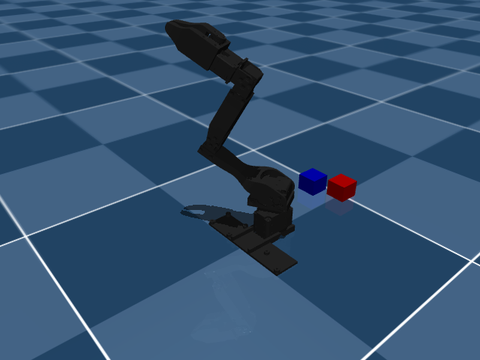

In [9]:
images = {
    'Initial position': init_plot,
    'Desire end effector position': target_plot,
}

print(init_point, target_point)
media.show_images(images, width=480, downsample=True)

In [10]:
from interface import SimulatedRobot

data.qpos = qinit
mujoco.mj_forward(model, data)

r = SimulatedRobot(model, data)

frames = []
fps = 30

prev_error = np.inf
for i in range(100):
    q_target_pos = r.inverse_kinematics(target_point, 0.2, jname)

    error = np.linalg.norm(target_point-data.body(jname).xpos)

    if abs(error - prev_error) <= 1e-6:
        print('Ends at {}-th step'.format(i))
        break
    
    r.d.qpos[:6] = q_target_pos[:6]
    mujoco.mj_forward(r.m, r.d)
    renderer.update_scene(r.d, camera)
    frames.append(renderer.render())

    prev_error = error

Ends at 48-th step


In [11]:
media.show_video(frames, fps=fps, loop=False)

Initial position,Desire end effector position,After IK

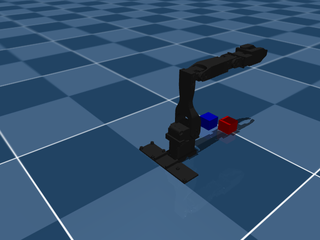
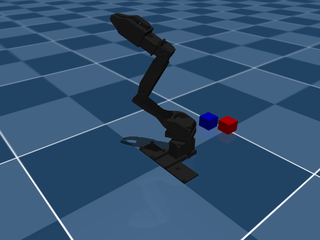
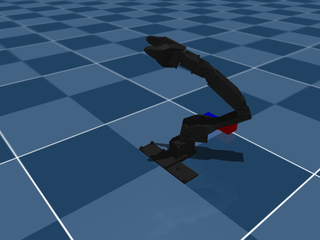

In [12]:
images = {
    'Initial position': init_plot,
    'Desire end effector position': target_plot,
    'After IK': frames[-1]
}

media.show_images(images, width=320, downsample=True)

In [13]:
data.qpos = qinit
mujoco.mj_forward(model, data)

r = SimulatedRobot(model, data)

frames = []
fps = 30

prev_error = np.inf
for i in range(500):
    r.inverse_kinematics_rot(target_point, target_rot, 0.1, jname)
    
    renderer.update_scene(r.d, camera)
    frames.append(renderer.render())

    prev_error = error

In [14]:
media.show_video(frames, fps=fps, loop=False)

Initial position,Desire end effector position,After IK

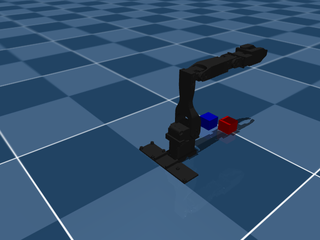
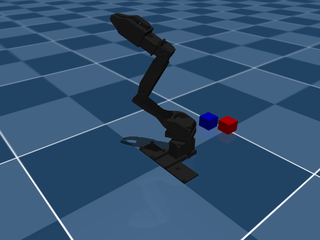
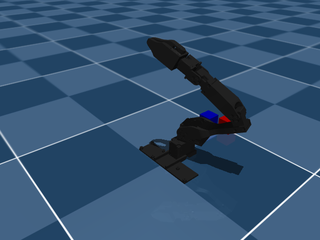

In [15]:
images = {
    'Initial position': init_plot,
    'Desire end effector position': target_plot,
    'After IK': frames[-1]
}

media.show_images(images, width=320, downsample=True)